In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('C:\\Users\\N.R.N.VARMA\\football.csv')



In [4]:
df['fpl_sel'] = df['fpl_sel'].replace('%','',regex=True).astype('float')

In [14]:
df.head(3)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2,Czech Republic,0,6,1,1,0


In [ ]:
#FirstOne

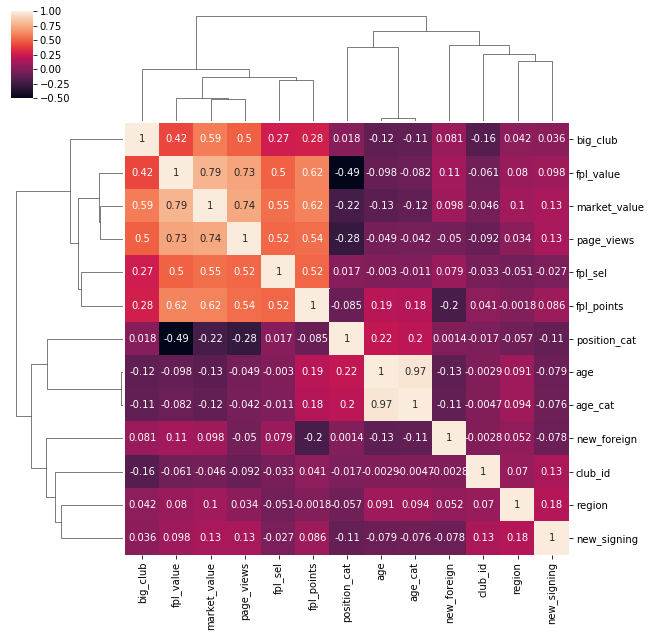

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(df.corr(),annot=True)

In [7]:
X=df[['position_cat','age','fpl_sel','fpl_points','page_views','fpl_value']]
y=df['market_value']


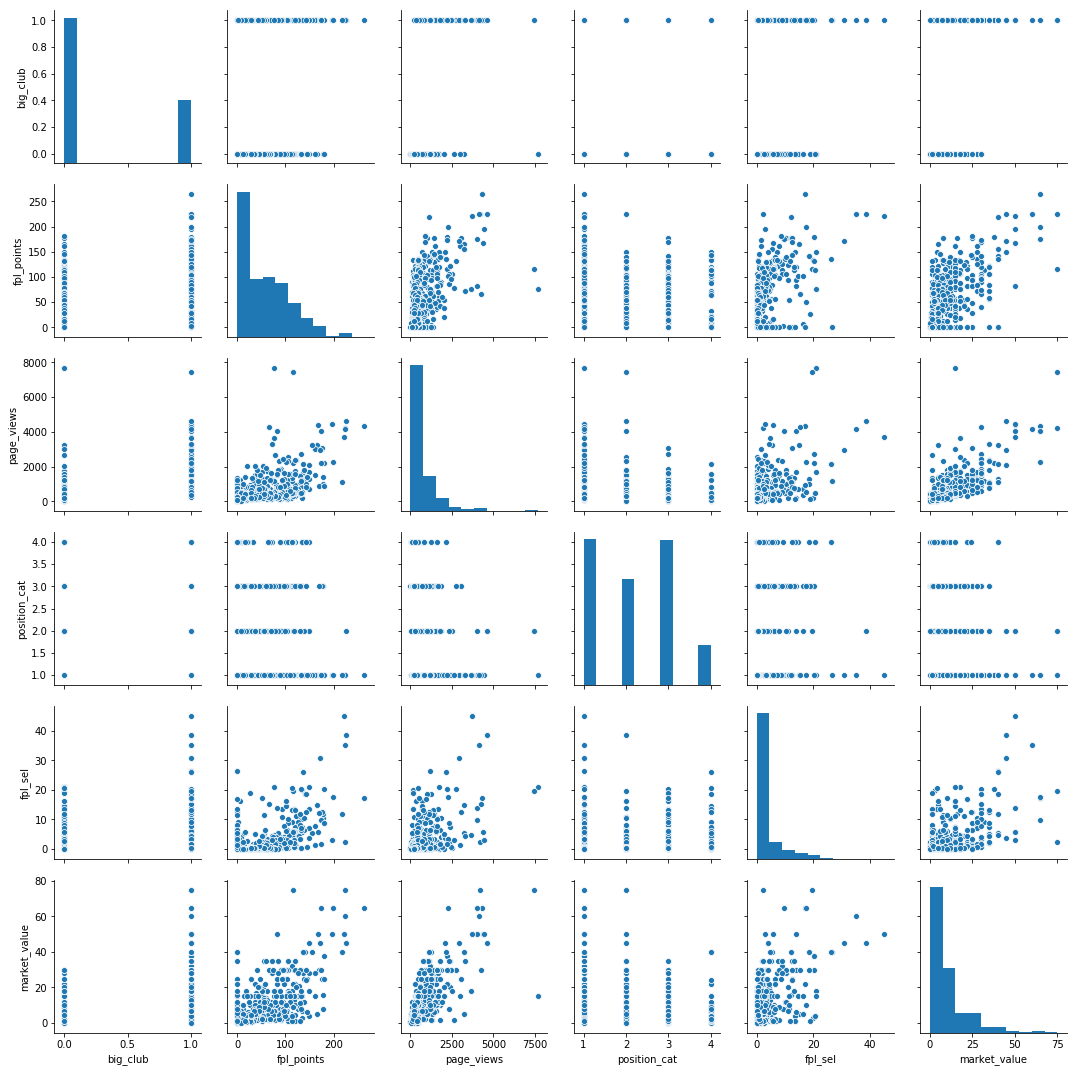

In [8]:
sns.pairplot(df[['big_club','fpl_points','page_views','position_cat','fpl_sel','market_value']])

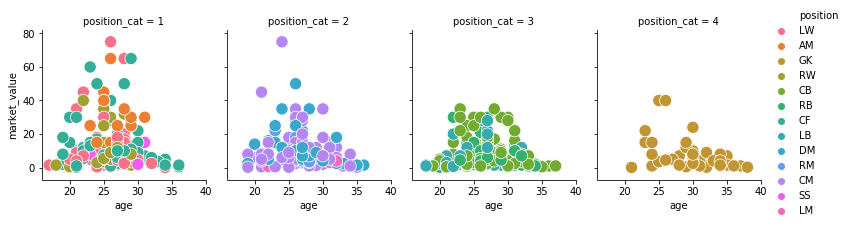

In [10]:
sns.relplot(data=df, x="age", y="market_value", hue="position", col="position_cat",s=150,height=3,aspect=.9)

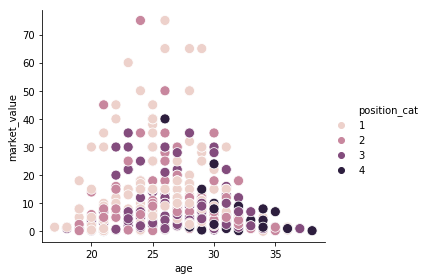

In [11]:
sns.relplot(x='age',y='market_value',data=df,hue='position_cat',height=4,s=100,aspect=1.2)

In [12]:
from math import sqrt
from sklearn.metrics import mean_squared_error

X=df[['position_cat','age','fpl_sel','fpl_points','page_views','fpl_value']]
y=df['market_value']

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


LR = LinearRegression(normalize=True)
LR.fit(X, y)
lr_y_pred=LR.predict(X)

RR = Ridge(alpha=0.01)
RR.fit(X, y) 
rr_y_pred= RR.predict(X)

Lasso = Lasso(alpha=0.01)
Lasso.fit(X, y) 
lasso_y_pred= Lasso.predict(X)

KNN_MSE = [] 
for K in range(10):
    K = K+1
    KNN = KNeighborsRegressor(n_neighbors = K)
    KNN.fit(X,y) 
    knn_y_pred=KNN.predict(X) 
    error = sqrt(mean_squared_error(y,knn_y_pred)) 
    KNN_MSE.append(error) 
    
SVM=SVR()
SVM.fit(X,y)
svm_y_pred=SVM.predict(X)

DT=DecisionTreeRegressor()
DT.fit(X,y)
dt_y_pred=DT.predict(X)

RF=RandomForestRegressor()
RF.fit(X,y)
rf_y_pred=RF.predict(X)

GB = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)
GB.fit(X,y)
gb_y_pred = GB.predict(X)

C:\Users\N.R.N.VARMA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N.R.N.VARMA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
Name = df.iloc[:,0]
MarketValue = df.iloc[:,5]
y_prediction = {'Name':  [],'Market_Value':[],'LinearRegression_Y': [],'Ridge_Y': [],'Lasso_Y': [],'KNeighbors_Y': [],'SVM_Y': [],'DecisionTree_Y': [],'RandomForest_Y': [],'GradientBoosting_Y': []}
MarketValue_Prediction = pd.DataFrame (y_prediction)


In [16]:
for i in range(461):
    MarketValue_Prediction = MarketValue_Prediction.append( {'Name':  Name[i],'Market_Value':MarketValue[i],'LinearRegression_Y': lr_y_pred[i],'Ridge_Y': rr_y_pred[i],'Lasso_Y': lasso_y_pred[i],'KNeighbors_Y': knn_y_pred[i],'SVM_Y': svm_y_pred[i],'DecisionTree_Y': dt_y_pred[i],'RandomForest_Y': rf_y_pred[i],'GradientBoosting_Y': gb_y_pred[i]},ignore_index=True)

In [17]:
MarketValue_Prediction.head()

,Name,Market_Value,LinearRegression_Y,Ridge_Y,Lasso_Y,KNeighbors_Y,SVM_Y,DecisionTree_Y,RandomForest_Y,GradientBoosting_Y
0,Alexis Sanchez,65.0,61.710040,61.709566,61.658415,54.0,7.606655,65.0,65.50,59.001226
1,Mesut Ozil,50.0,45.293970,45.293821,45.281175,54.0,7.606655,50.0,49.50,59.001226
2,Petr Cech,7.0,17.314390,17.314323,17.301481,20.4,6.899531,7.0,7.15,14.988510
3,Theo Walcott,20.0,26.136228,26.136212,26.141151,30.1,7.606655,20.0,19.60,20.541226
4,Laurent Koscielny,22.0,16.006666,16.006494,15.986069,22.0,7.606655,22.0,19.20,14.988510
